In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels 
import statsmodels.api as sm 
from statsmodels.tsa.stattools import coint, adfuller 
import yfinance as yf 


<H3><B> Stationarity/Non-Stationarity </B></H3>
A commonly untested assumption in time series analysis is the stationarity of data. Data are stationary when the parameters of the data generation process do not change over time. As an example, lets consider two series, A and B. Series A is generated from a stationary process with fixed parameters, series B is generated with parameters that change over time.

In [3]:
def generate_datapoint(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu,sigma)


<h3><b> Series A</b></h3>
    Stationarity

/var/folders/_f/lm78gx9j0yzd5whlktz22zjm0000gn/T/ipykernel_20838/2633950180.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  A = pd.Series(index =range(T))


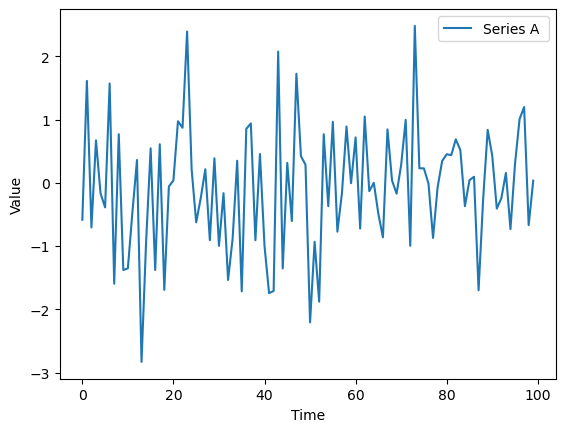

In [4]:
# Set the parameters an the number of datapoints 

params = (0,1)
T = 100

A = pd.Series(index =range(T))
A.name = "A"

for t in range(T):
    A[t] = generate_datapoint(params)

plt.plot(A)
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(["Series A "]);

<h3><b> Series B</b></h3>
Non-Stationarity

/var/folders/_f/lm78gx9j0yzd5whlktz22zjm0000gn/T/ipykernel_20838/1252282043.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  B = pd.Series(index =range(T))


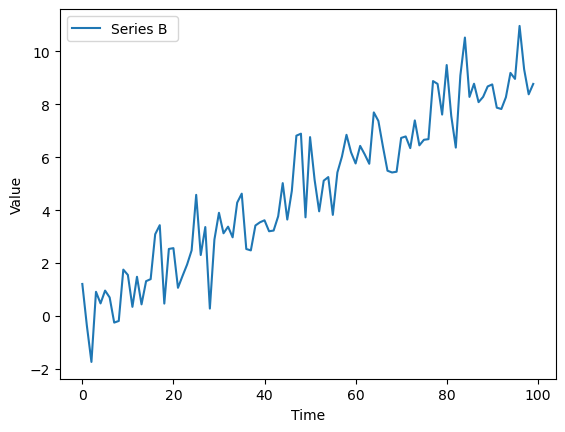

In [5]:
# Set the parameters an the number of datapoints 
T = 100

B = pd.Series(index =range(T))
B.name = "B"

for t in range(T):
    # now the parameteres are dependant on time 
    # Specifically, the mean of the series changes over time 
    params = (t* 0.1, 1)
    B[t] = generate_datapoint(params)

plt.plot(B)
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(["Series B "]);

<h3><b> Why Non-Stationarity is Dangerous</b></h3>
Many statistical tests, deep down in the fine print of their assumptions, require the dat being tested are stationary. Also, if you naively
use certian statistics on a non-stationary data set, you will get garbage results, An example lets take an average through our non-stationary 

B

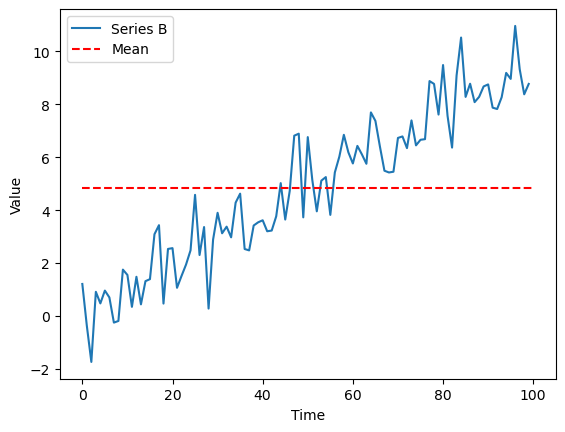

In [6]:
m = np.mean(B)

plt.plot(B)
plt.hlines(m, 0, len(B), linestyles= "dashed", colors="r")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend(["Series B", "Mean"]);


<h3><b> Testing for Stationarity</b></h3>


In [7]:
def check_for_stationarity(X, cutoff = 0.01):
    # H_0 in adfuller is unit root exist (non-stationary)
    # We must observe significant p-value to convince ourselves that a series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print("P-value = " + str(pvalue) + " The series " + X.name + " is likely stationary. ")
        return True 
    else: 
        print("P-value = " + str(pvalue) + " The series " + X.name + " is likely non-stationary. ")
        return False
        

In [8]:
check_for_stationarity(A);
check_for_stationarity(B);

P-value = 3.426888665349205e-20 The series A is likely stationary. 
P-value = 0.846183993857959 The series B is likely non-stationary. 


<h3><b> Order of Integration </b></h3>


In [9]:
# real data 
symbol_list = ["MSFT"]
prices = yf.download(symbol_list, start= "2014-01-01", end = "2015-01-01")
X = prices["Close"]

[*********************100%***********************]  1 of 1 completed


In [10]:
check_for_stationarity(X);

P-value = 0.665752402093435 The series Close is likely non-stationary. 


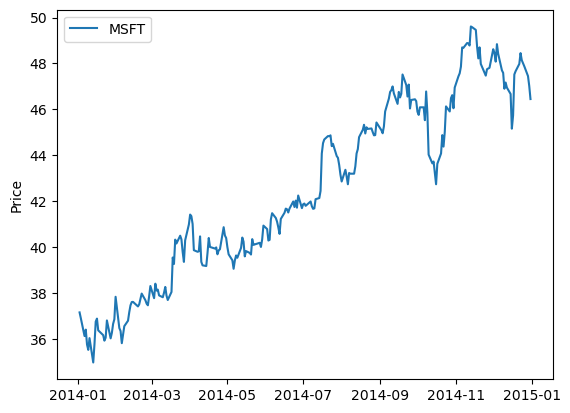

In [11]:
plt.plot(X.index, X.values)
plt.ylabel("Price")
plt.legend(symbol_list);

P-value = 1.4142735261511517e-28 The series Close Additive Returns is likely stationary. 


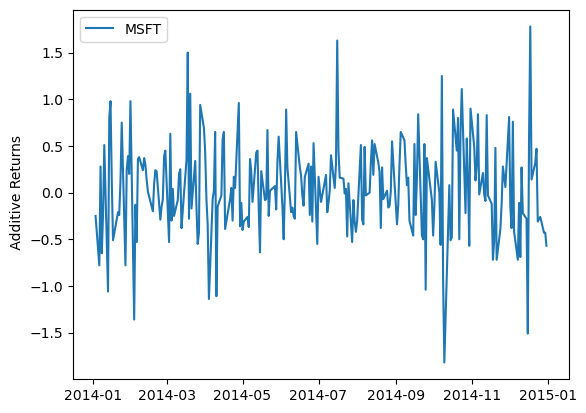

In [12]:
X1 = X.diff()[1:]
X1.name = (X.name + " Additive Returns")
check_for_stationarity(X1)
plt.plot(X1.index, X1.values)
plt.ylabel(" Additive Returns")
plt.legend(symbol_list);

P-value = 7.565950843465781e-29 The series Close Multiplicative Returns is likely stationary. 


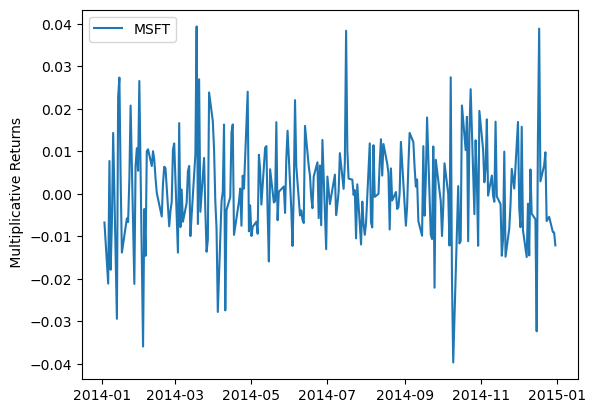

In [13]:
X1 = X.pct_change()[1:]
X1.name = (X.name + " Multiplicative Returns")
check_for_stationarity(X1)
plt.plot(X1.index, X1.values)
plt.ylabel(" Multiplicative Returns")
plt.legend(symbol_list);

<h3><b>Cointegration</b></h3>

In [14]:
# simulated example 
N = 100

X1  = np.random.normal(0,1,N)
# Integrate it to make it I(1)
X1 = np.cumsum(X1)
X1 = pd.Series(X1)
X1.name = "X1"

# Make an X2 that is X1 plus some noise 
X2 = X1 + np.random.normal(0,1,N)
X2.name = "X2"


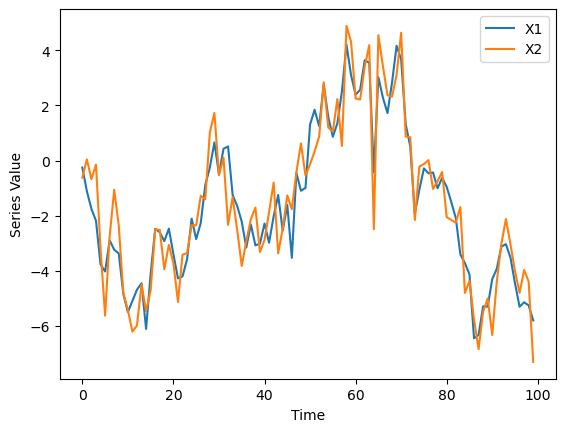

In [15]:
plt.plot(X1)
plt.plot(X2)
plt.xlabel("Time")
plt.ylabel("Series Value")
plt.legend([X1.name, X2.name]);